This is an exploration of the MNIST (Mixed National Institute of Standards and Technology database) data, which is a collection of 28 by 28 pixel images of hand drawn number characters in grayscale. They were collected from Kaggle.com. 
Here, I investigate the use of different classification algorithms on the data.
More research on this data can be found at http://yann.lecun.com/exdb/mnist/index.html.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pylab as plt
import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.read_csv('train.csv')

Below is an example image.

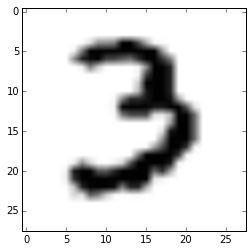

In [29]:
plt.set_cmap('Greys')
plt.imshow(df.loc[9][1:].reshape(28,28))

The dataframe below shows the format the data arrives in, after moving it from a csv file into pandas.

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
scores = []
for i in range(1,102,5):
    print i
    start = time.time()
    clf = RandomForestClassifier(i)
    clf.fit(X=df.drop('label',1)[:20000],y=df.label[:20000])
    stop = time.time()
    scores.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101


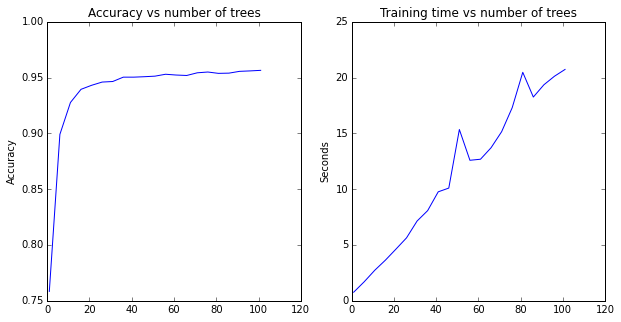

In [80]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],scores),map(lambda x: x[1],scores))
ax2.plot(map(lambda x: x[0],scores),map(lambda x: x[2],scores))
ax1.set_title('Accuracy vs number of trees')
ax2.set_title('Training time vs number of trees')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

In [90]:
SVMscores = []
for i in range(1,10):
    print i
    start = time.time()
    clf = SVC(kernel='poly',degree=i)
    clf.fit(X=df.drop('label',1)[:2000],y=df.label[:2000])
    stop = time.time()
    SVMscores.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

1
2
3
4
5
6
7
8
9


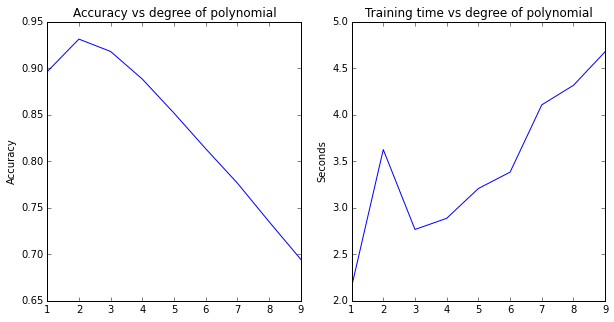

In [92]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],SVMscores),map(lambda x: x[1],SVMscores))
ax2.plot(map(lambda x: x[0],SVMscores),map(lambda x: x[2],SVMscores))
ax1.set_title('Accuracy vs degree of polynomial')
ax2.set_title('Training time vs degree of polynomial')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

In [95]:
SVMscores2 = []
for i in range(10,4000,100):
    print i
    start = time.time()
    clf = SVC(kernel='poly',degree=2)
    clf.fit(X=df.drop('label',1)[:i],y=df.label[:i])
    stop = time.time()
    SVMscores2.append((i,clf.score(df.drop('label',1)[20000:30000],df.label[20000:30000]),stop-start))

10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910
2010
2110
2210
2310
2410
2510
2610
2710
2810
2910
3010
3110
3210
3310
3410
3510
3610
3710
3810
3910


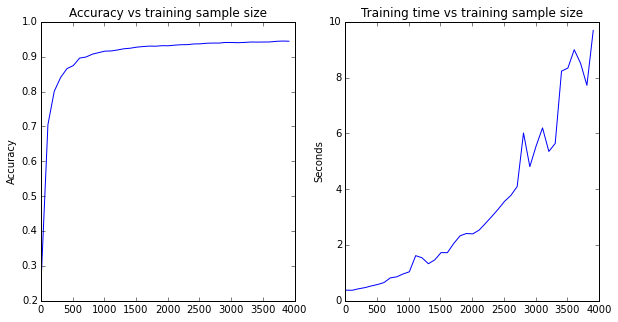

In [97]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5])
ax1.plot(map(lambda x: x[0],SVMscores2),map(lambda x: x[1],SVMscores2))
ax2.plot(map(lambda x: x[0],SVMscores2),map(lambda x: x[2],SVMscores2))
ax1.set_title('Accuracy vs training sample size')
ax2.set_title('Training time vs training sample size')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Seconds')

Above, it appears that we get diminishing returns on training data after around 2500 samples, but training time continues to increase.

Below, I'm experimenting using PyBrain for classification. Unfortunately, my computer is too slow for running ideal tests

In [3]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer

In [157]:
trndata = ClassificationDataSet(784, 1, nb_classes=10)
for row in range(2000):
    trndata.addSample(df.iloc[row][1:],df.iloc[row].label)

In [158]:
trndata._convertToOneOfMany()

In [159]:
trndata

In [173]:
fnn = buildNetwork(trndata.indim, 1, trndata.outdim, outclass=SoftmaxLayer)
trainer = BackpropTrainer(fnn, dataset=trndata, verbose=True, lrdecay=0.9999)

In [174]:
#trainer.train()
#for i in range(5):
#    trainer.train()
trainer.trainUntilConvergence()

Total error:  0.0464984649379
Total error:  0.0452068150493
Total error:  0.0450390504191
Total error:  0.0450101838155
Total error:  0.0450020736701
Total error:  0.0449998798681
Total error:  0.0449971420905
Total error:  0.0449951681203
Total error:  0.0449932720043
Total error:  0.0449914909254
Total error:  0.0449900329192
Total error:  0.0449885280011
Total error:  0.0449873296229
Total error:  0.0449863995126
Total error:  0.0449855345041
Total error:  0.0449847404879
Total error:  0.0449841680337
Total error:  0.0449835327604
Total error:  0.0449830008691
Total error:  0.0449826024232
Total error:  0.04498226372
Total error:  0.0449819320544
Total error:  0.0449816505419
Total error:  0.0449814192051
Total error:  0.0449812001108
Total error:  0.0449810460781
Total error:  0.0449809030958
Total error:  0.0449807744258
Total error:  0.0449806470857
Total error:  0.0449805724528
Total error:  0.0449804757138
Total error:  0.0449804113919
Total error:  0.0449803435899
Total error:

KeyboardInterrupt: 

In [178]:
(df[2000:3000].apply(lambda x: np.argmax(fnn.activate(x[1:])),axis=1) == df[2000:3000].label).mean()

0.089999999999999997